## **Лабораторна робота No.2**

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [18]:
def generate_data(n):
    """
    Генерує n незалежних нормально розподілених випадкових величин X_i.
    Імовірності станів: p0=0.1, p1=0.2, p2=0.3, p3=0.4
    Середні стани: a_k = k для k=0,1,2,3
    Дисперсія = 1
    """
    p = np.array([0.1, 0.2, 0.3, 0.4])  # істинні ймовірності
    a = np.array([0.0, 1.0, 2.0, 3.0])  # істинні середні
    states = np.random.choice([0,1,2,3], size=n, p=p)
    data = np.random.normal(loc=a[states], scale=1.0, size=n)
    return data, p, a

In [20]:
def em_algorithm(data, tol=0.001, max_iter=1000, verbose=True):
    """
    EM-алгоритм для суміші 4-х нормальних розподілів з відомою дисперсією 1.

    Параметри:
    data : масив спостережень
    tol : допуск для зупинки
    max_iter : максимальна кількість ітерацій
    verbose : виводити інформацію про ітерації

    Повертає:
    p_k : оцінки ймовірностей компонент
    a_k : оцінки середніх значень компонент
    """

    n = len(data)
    K = 4
    # Початкові оцінки
    p_k = np.full(K, 1.0/K)
    a_k = np.linspace(0, 3, K)

    for iteration in range(max_iter):
        # E-крок
        pdf_matrix = np.zeros((n, K))
        for k in range(K):
            pdf_matrix[:, k] = p_k[k] * norm.pdf(data, loc=a_k[k], scale=1.0)
        denom = pdf_matrix.sum(axis=1, keepdims=True)
        w = pdf_matrix / denom

        # M-крок
        p_k_new = w.sum(axis=0) / n
        a_k_new = (w * data[:, np.newaxis]).sum(axis=0) / w.sum(axis=0)

        diff = np.max(np.abs(np.concatenate([p_k_new - p_k, a_k_new - a_k])))
        p_k, a_k = p_k_new, a_k_new
        if verbose:
            print(f"Ітерація {iteration+1}: p={p_k}, a={a_k}, diff={diff}")

        if diff < tol:
            if verbose:
                print("Алгоритм збігся.")
            break

    return p_k, a_k

In [22]:
def plot_results(data, p_k, a_k):
    plt.figure(figsize=(10,6))
    count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', edgecolor='black', label='Дані')
    x = np.linspace(min(data)-1, max(data)+1, 200)
    mixture_pdf = np.zeros_like(x)

    for k in range(len(p_k)):
        comp_pdf = p_k[k] * norm.pdf(x, loc=a_k[k], scale=1.0)
        mixture_pdf += comp_pdf
        plt.plot(x, comp_pdf, linestyle='--', label=f'Компонента {k}, a={a_k[k]:.2f}, p={p_k[k]:.2f}')

    plt.plot(x, mixture_pdf, 'r-', linewidth=2, label='Суміш')
    plt.title('Оцінена суміш нормальних розподілів')
    plt.xlabel('x')
    plt.ylabel('Густина ймовірності')
    plt.legend()
    plt.grid(True)
    plt.show()


Обсяг вибірки: 10
Оціночні ймовірності станів: [0.258 0.211 0.289 0.242]
Оціночні середні значення: [0.13  1.958 1.984 3.606]
Різниця за ймовірностями: [0.158 0.011 0.011 0.158]
Різниця за середніми: [0.13  0.958 0.016 0.606]

Обсяг вибірки: 100
Оціночні ймовірності станів: [0.231 0.252 0.394 0.123]
Оціночні середні значення: [0.678 2.133 2.183 3.682]
Різниця за ймовірностями: [0.131 0.052 0.094 0.277]
Різниця за середніми: [0.678 1.133 0.183 0.682]

Обсяг вибірки: 1000
Оціночні ймовірності станів: [0.181 0.232 0.243 0.344]
Оціночні середні значення: [0.706 0.922 2.614 2.953]
Різниця за ймовірностями: [0.081 0.032 0.057 0.056]
Різниця за середніми: [0.706 0.078 0.614 0.047]

Обсяг вибірки: 5000
Оціночні ймовірності станів: [0.16 0.22 0.29 0.33]
Оціночні середні значення: [0.209 1.353 2.184 3.092]
Різниця за ймовірностями: [0.06 0.02 0.01 0.07]
Різниця за середніми: [0.209 0.353 0.184 0.092]

Обсяг вибірки: 10000
Оціночні ймовірності станів: [0.161 0.211 0.289 0.339]
Оціночні середні з


Введіть n (розмір вибірки) для побудови графіка:  500


Ітерація 1: p=[0.15163    0.20028197 0.28105161 0.36703642], a=[0.22391774 1.33181027 2.31873846 3.20876713], diff=0.33181026582249706
Ітерація 2: p=[0.15042318 0.19533024 0.28441308 0.3698335 ], a=[0.16963774 1.36132483 2.34459452 3.16859102], diff=0.05427999647641349
Ітерація 3: p=[0.15004088 0.19166819 0.28647176 0.37181917], a=[0.13306757 1.38184134 2.36286125 3.14237746], diff=0.03657017101850793
Ітерація 4: p=[0.1500704  0.18894554 0.28780007 0.37318399], a=[0.11093819 1.39617357 2.37608518 3.12398986], diff=0.022129376959189512
Ітерація 5: p=[0.15037837 0.18683927 0.2886427  0.37413966], a=[0.09849476 1.40608365 2.38616293 3.11070513], diff=0.01328473151373899
Ітерація 6: p=[0.15088348 0.18513131 0.28915496 0.37483025], a=[0.09219396 1.41293192 2.39426009 3.10089473], diff=0.009810393112010818
Ітерація 7: p=[0.15152194 0.18368627 0.28944597 0.37534583], a=[0.08972599 1.41772724 2.40105417 3.09347218], diff=0.0074225584389626675
Ітерація 8: p=[0.15224472 0.18242093 0.28959172 0.3

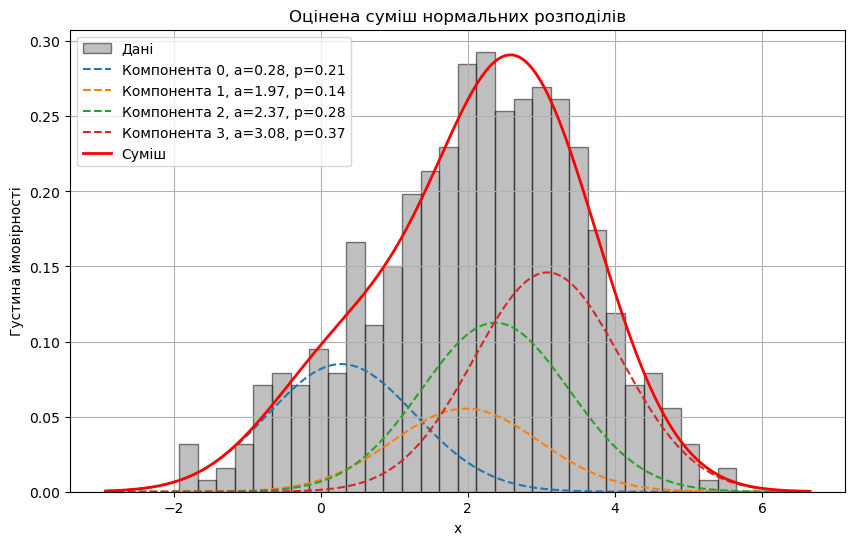

In [24]:
def main():
    # Істинні параметри
    true_p = np.array([0.1, 0.2, 0.3, 0.4])
    true_a = np.array([0.0, 1.0, 2.0, 3.0])

    # Приклад: масив різних розмірів вибірки
    sample_sizes = [10, 100, 1000, 5000, 10000]

    for size in sample_sizes:
        print(f"\nОбсяг вибірки: {size}")
        data, p_true, a_true = generate_data(size)

        p_est, a_est = em_algorithm(data, tol=0.001, max_iter=1000, verbose=False)

        # Обчислюємо різницю між істинними та оціненими параметрами
        p_diff = np.abs(p_true - p_est)
        a_diff = np.abs(a_true - a_est)

        print("Оціночні ймовірності станів:", p_est.round(3))
        print("Оціночні середні значення:", a_est.round(3))
        print("Різниця за ймовірностями:", p_diff.round(3))
        print("Різниця за середніми:", a_diff.round(3))

    # Додаткова можливість: один вибір n від користувача з візуалізацією
    try:
        n = int(input("\nВведіть n (розмір вибірки) для побудови графіка: "))
        if n <= 0:
            raise ValueError("n повинно бути більше 0.")
    except ValueError as e:
        print("Помилка:", e)
        return

    data, p_true, a_true = generate_data(n)
    p_est, a_est = em_algorithm(data, tol=0.001, max_iter=1000, verbose=True)

    # Виведемо різниці для цієї вибірки
    p_diff = np.abs(p_true - p_est)
    a_diff = np.abs(a_true - a_est)
    print("\nОціночні ймовірності станів:", p_est.round(3))
    print("Оціночні середні значення:", a_est.round(3))
    print("Різниця за ймовірностями:", p_diff.round(3))
    print("Різниця за середніми:", a_diff.round(3))

    # Візуалізація для конкретного n
    plot_results(data, p_est, a_est)

if __name__ == "__main__":
    main()

**Пояснення загальне**:
1. Відповідно до умови завдання визначаємо ймовірності перебування в станах: p0 = 0.1, p1 = 0.2, p2 = 0.3, p3 = 0.4. Послідовно генеруємо стан для кожної точки згідно з цими ймовірностями, а потім генеруємо нормальні величини з відповідними параметрами.
2. Реалізовуємо алгоритм самонавчання (EM алгоритм) для оцінки ймовірностей pk та параметрів ak.
3. Важливі зауваження для аналізу: при малих n оцінки можуть бути нестійкими та далекими від справжніх значень через високу варіативність даних; при великих n оцінки будуть ближчими до істинних параметрів, оскільки вибірка краще репрезентує справжній розподіл.
4. Аналізуємо результат, який ми отримали при n=500. Бачимо, що алгоритм EM дає досить стабільні оцінки. На зображенні видно, що одна з компонент отримала найбільшу вагу і середнє, близьке до 3, тоді як інші компоненти розподілилися навколо менших значень. Це відображає природну варіацію випадково згенерованих даних: інколи деякі компоненти можуть бути переоцінені чи недооцінені через статистичний розподіл вибірки. Але загалом, червона крива (оцінена суміш) досить точно підлаштовується під гістограму, свідчачи про адекватність оцінених параметрів.

**Аналіз поведінки алгоритми (завдання 3)**:

Вплив розмірку вибірки n:
1. Коли розмір вибірки дуже малий (наприклад, n=10), результати сильно варіюються. Істинні параметри (ймовірності та середні значення компонент) майже напевно будуть оцінені з великими похибками. Причина – недостатня кількість даних для адекватного апроксимування справжнього розподілу.
2. Для середніх вибірок (n=100 або/та n=500) точність покращується, але все ще можуть спостерігатися помітні відхилення. Наприклад, при n=100 зміни стають менш хаотичними, але модель може все ще недостатньо точно відтворити істинні параметри. Відповідно кращі результати у порівнянні з малими вибірками, але похибки ще значні. При n=500 ми бачимо суттєве покращення результатів, але спостерігаємо явище, коли одна або дві компоненти все ще залишаються або недооціненими, або переоціненими (можемо побачити по графіку вище).
3. Великі вибірки (n = 1000, 5000, 10000) демонструють те, що параметри збігаються до істинних значень дедалі точніше. Коли n=1000 похибки помітно зменшуються, хоча іноді деякі компоненти все ще дещо зміщені. При n=5000, 10000 оцінки стають ближчими до істинних. Зменшується різниця як за ймовірностями, так і за середніми. Це підтверджує, що **EM-алгоритм є обґрунтованим статистично** – зі збільшенням розміру вибірки його оцінки збігаються до істинних параметрів.

Вплив початкових оцінок параметрів:
1. **Рівномірні початкові ймовірності і фіксовані середні**: якщо починати з однакових ймовірностей для всіх компонент (наприклад, по 0.25) та середніх, що не відображають реальний розподіл (наприклад, [0,1,2,3]), алгоритм все одно врешті-решт збіжиться. Однак алгоритму може знадобитися більше ітерацій до збіжності. При цьому є ризик застрягти в локальному максимумі чи отримати зсув у параметрах, якщо вибірка мала або невдало розподілена.
2. **Адаптивна ініціалізація**: використання початкових середніх, вибраних відповідно до статистики даних (наприклад, розташування між мінімумом і максимумом вибірки) або застосування простих кластеризаційних методів (наприклад, k-means для знаходження центрів) може прискорити збіжність і зменшити похибки. Це особливо помітно на малих вибірках, де поганий старт може сильно вплинути на результати.

**Висновки**:
1. На малих вибірках випадковий шум має великий вплив. Алгоритм підлаштовується під обмежений набір спостережень, що призводить до нестабільних оцінок.
2. При збільшенні n точність зростає. Алгоритм має змогу краще "розрізнити" компоненти суміші, оскільки вибірка стає більш репрезентативною.
3. Початкові оцінки впливають на швидкість і якість збіжності. Кращі початкові оцінки призводять до швидшої збіжності та точніших оцінок при однаковому обсязі даних.
4. Використання великої вибірки та ретельний підбір початкових умов мінімізують ризик локальних максимумів та значних похибок.

Отже, алгоритм самонавчання EM для змішаної нормальної моделі добре працює на великих вибірках і з розумними початковими оцінками (з врахуванням відповідних початкових статистичних даних). При малих обсягах даних і невдалій ініціалізації результати можуть бути неточними та зазнавати значних статистичних флуктуацій. Проте візуалізація та кількісний аналіз різниць між істинними й оціненими параметрами дозволяють зрозуміти, як розмір вибірки та початкові умови впливають на кінцеві оцінки та відозмінити алгоритм в процесі аналізу.